# GP02 GeoPandas
GeoPandas Full Documentation: https://geopandas.org/en/stable/docs.html

Spatial Reference: https://spatialreference.org/
___
## 3. Data Subset
* Reading large datasets can be resources demanding. Such a task can be better managed when a subset of the geospatial data to be read at a time:
    * Data subset via Geometry
    * Data subset via Rows filter

In [40]:
# Library import + Data Load
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
c = gpd.read_file('localdata/countries.shp')
c.head(3)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [3]:
# Coordinates Reference System check
c.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Geodataframe plot
c.plot()

In [ ]:
# Filter rows based on 'Asia' in the column, 'CONTINENT'
c[c["CONTINENT"] == "Asia"]

<Axes: >

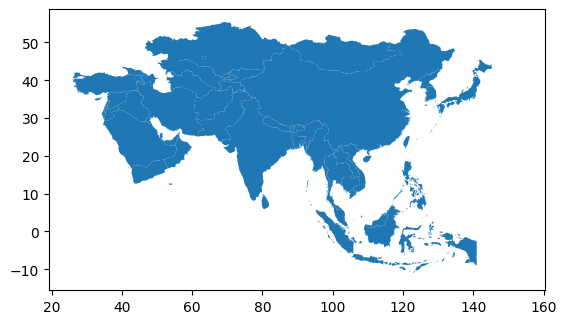

In [9]:
# Plot for only the Asia region
c[c["CONTINENT"] == "Asia"].plot()

#### Data Subset: Information filtration via the mask parameter (Geometry)

<Axes: >

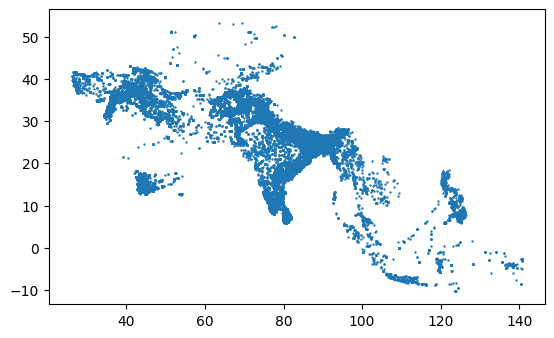

In [14]:
# Reading (~50s) Acled Dataset by subseting Asia (via the mask parameter)
# IMPORTANT NOTE: the original acled2019.shp file was first created in GP01

acledAsia = gpd.read_file('localdata/acled2019.shp', mask = c[c['CONTINENT'] == 'Asia'])
acledAsia.plot(markersize=0.5)

#### Data Subset: Information filtration via the rows parameter

<Axes: >

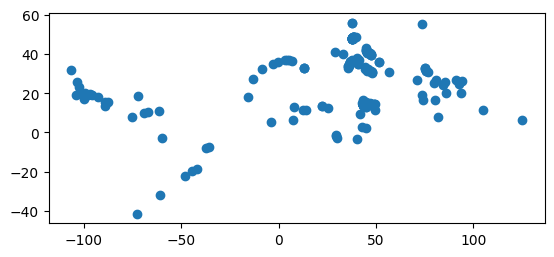

In [16]:
# Read data subset(ss) via the first 200 rows
ss200 = gpd.read_file("localdata/acled2019.shp", rows=200)
ss200.plot()

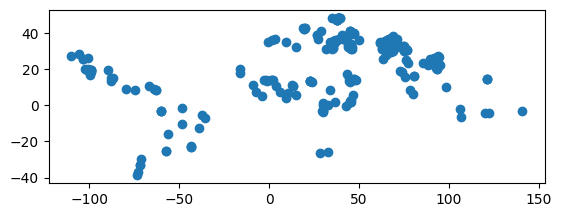

In [17]:
# Read data subset(ss) for rows 200-500
ss200500 = gpd.read_file("localdata/acled2019.shp", rows=slice(200, 500))
ss200500.plot();

___
## 4. GeoDataFrame & GeoSeries
* Loading data with GeoPandas derives a table of geographic geometries for performing spatial operations.
* GeoSeries refers to a dataframe containing ONLY ONE column (1D) of geographic geometries.
* GeoDataFrame refers to a dataframe containing MULTIPLE columns of geographic geometries.
* The most important property of a GeoDataFrame: A 'geometry' GeoSeries column.
* All spatial methods applied onto a GeoDataFrame will be based on the 'geometry' GeoSeries column.

In [21]:
# Creating a pandas dataframe based on only two columns
df = c[['NAME', 'POP_EST']]
df.head()

,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992
2,Chile,17789267
3,Bolivia,11138234
4,Peru,31036656


In [22]:
# Checking the datatype of the newly created dataframe
type(df)

pandas.core.frame.DataFrame

In [24]:
# Creating a new GeoDataFrame (Notice the geometry column)
gdf = c[['NAME', 'geometry']]
gdf.head()

,NAME,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [25]:
# Checking the datatype of the newly created GeoDataFrame
type(gdf)

geopandas.geodataframe.GeoDataFrame

<Axes: >

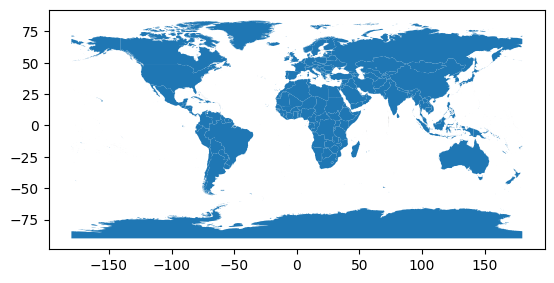

In [26]:
# GeoDataFrame quick plot
gdf.plot()

In [27]:
# Creating a normal Series
s = c['NAME']
s[:5]

0    Indonesia
1     Malaysia
2        Chile
3      Bolivia
4         Peru
Name: NAME, dtype: object

In [28]:
# Checking the datatype of the newly created Series
type(s)

pandas.core.series.Series

In [30]:
# Creating a GeoSeries + Displaying the first 3 rows
gs = c['geometry']
gs[:3]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
Name: geometry, dtype: geometry

In [31]:
# Checking the datatype of the newly created GeoSeries
type(gs)

geopandas.geoseries.GeoSeries

<Axes: >

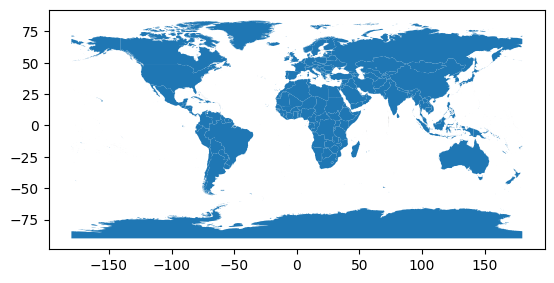

In [32]:
# GeoSeries quick plot
gs.plot()

___
## 5. Coordinate Reference System (CRS) & Projections

* CRS is a representation on how 2D planar data relates to actual places on Earth with attributes to their respective locations.
* Geodataframes contain the original data CRS attributes while the projected coordinate system provides the data for drawing on flat surfaces.
* CRS are required to perform all projections and geographical analysis as they are the standard values for features including countries, cities, rivers, and etc.

In [33]:
# Load data for the taken place conflicts
con = gpd.read_file("localdata/acled2019.shp", rows=500)
con.head()

,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


In [34]:
# CRS check
con.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
# CRS name check
con.crs.name

'WGS 84'

#### IMPORTANT NOTES:
* CRS are defined in various measurement units such as decimal degrees, metres, and etc.
* **Format conversion** is a common process in geographical data processing and projections.
* **Spatial Reference (for finding the correct projections):** https://spatialreference.org/
* Here, data will be processed into the Mercator projection (3395).
* Latitude-longitude quadrangles are stretched along the x-axis and y-axis, away from the equator.
* Displays the data CRS information: **.crs()**
* Project data of one set of coordinates to another: **.to_crs()**

In [36]:
# The geometry column in decimal degrees
c.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [37]:
ca = c[(c.NAME != "Antarctica") & (c.NAME != "Fr. S. Antarctic Lands")]

# Data projection into Mercator epsg=3395: to_crs()
cp = ca.to_crs(epsg=3395)

# The geometry column of the projected countries
cp['geometry'][:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    POLYGON ((-7737827.685 -1967028.785, -7737828....
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

<Axes: >

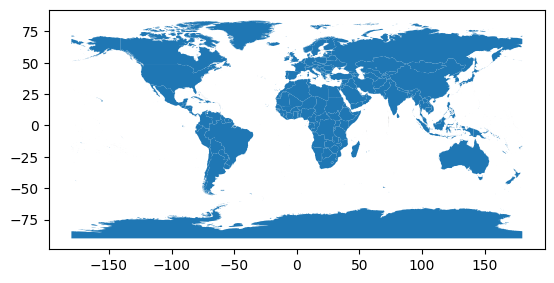

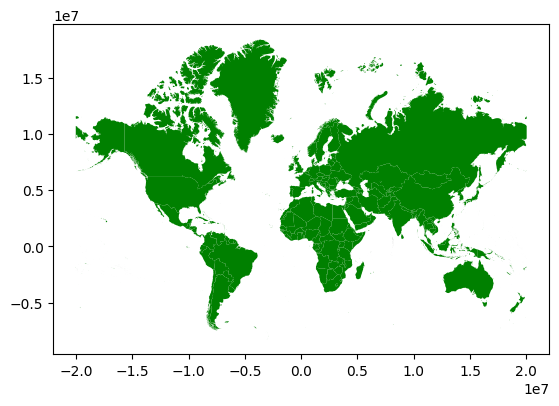

In [47]:
# The latitude-longitude quadrangles are stretched along the x-axis and y-axis in the projection
c.plot()
cp.plot(color='green')

<Axes: >

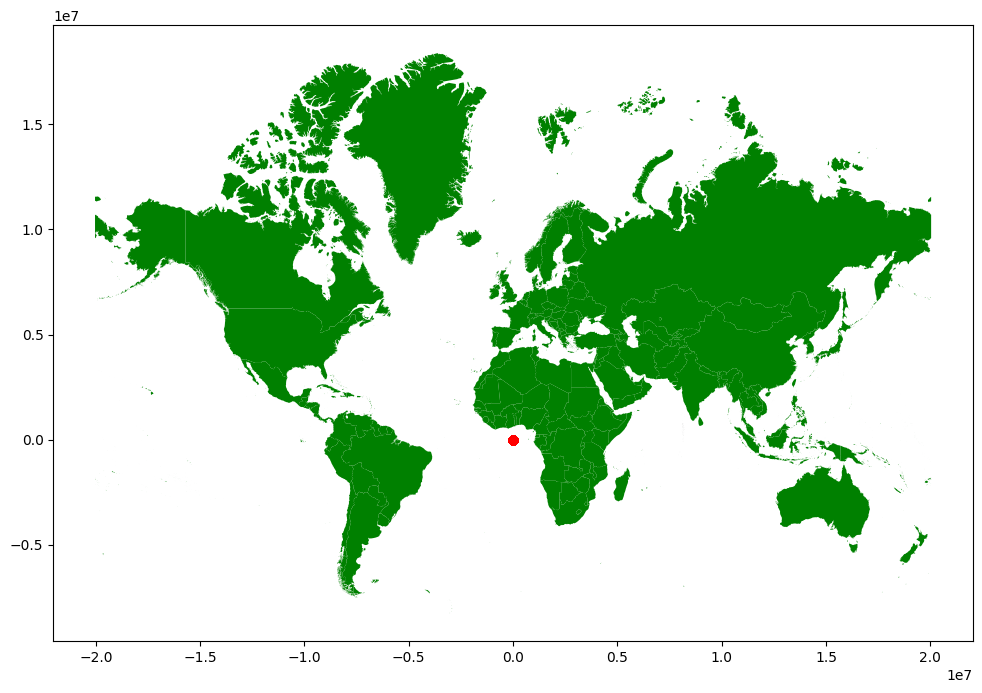

In [59]:
# Overlaying of the original and the projected data causes non alignment due to differences in the x & y scales.
fig, ax = plt.subplots(figsize=(12,8))
cp.plot(ax=ax, color='green')
con.plot(ax=ax, color='red') 

<Axes: >

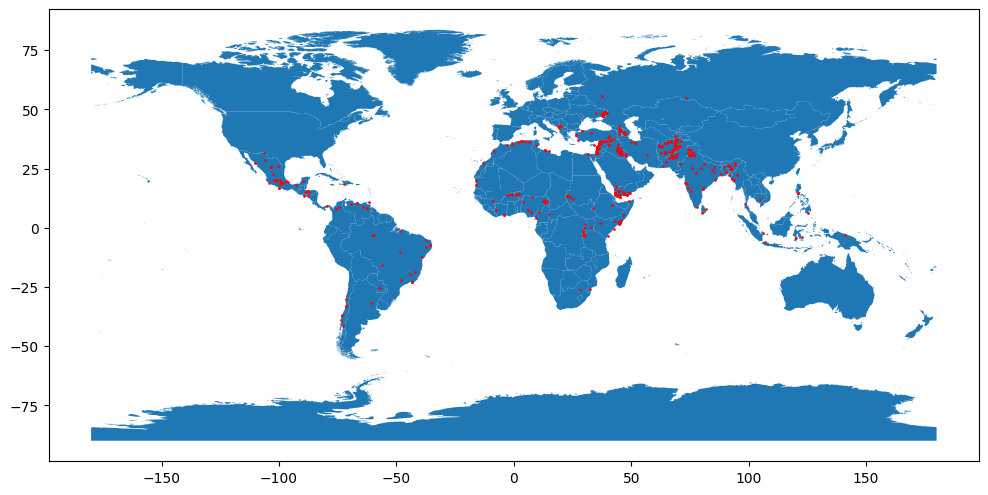

In [58]:
# Both c and con are based on WGS84 (unprojected)
fig, ax = plt.subplots(figsize=(12,8))
c.plot(ax=ax)
con.plot(ax=ax, color='red', markersize=0.8)

<Axes: >

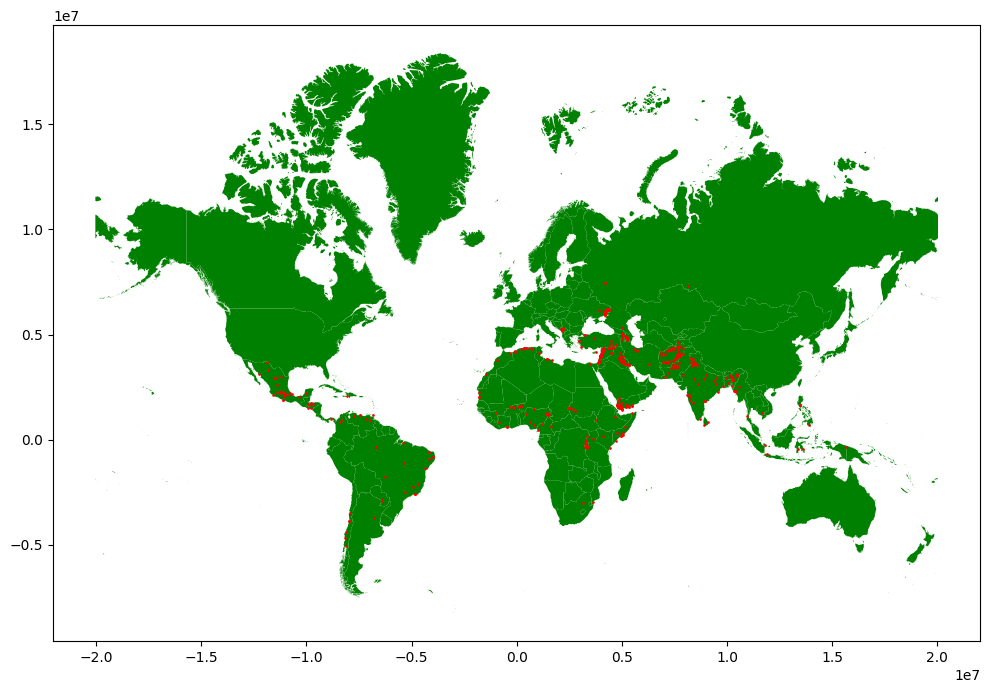

In [61]:
# Projection of the conflict data to Mercator epsg=3395
conp = con.to_crs(epsg=3395)
fig, ax = plt.subplots(figsize=(12,8))
cp.plot(ax=ax, color='green')
conp.plot(ax=ax, color='red', markersize=0.8)

___